<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Data Scientist Hourly Salary Box Plot (2.18.1)

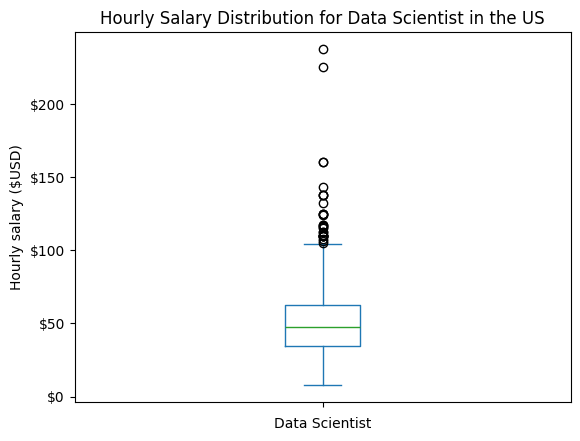

In [41]:
df_ds = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')]
df_ds = df_ds.dropna(subset='salary_hour_avg')

df_ds['salary_hour_avg'].plot(kind='box')
ax = plt.gca()
ax.set_xticklabels([])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))

plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly salary ($USD)')
plt.show()


---

## 🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2)

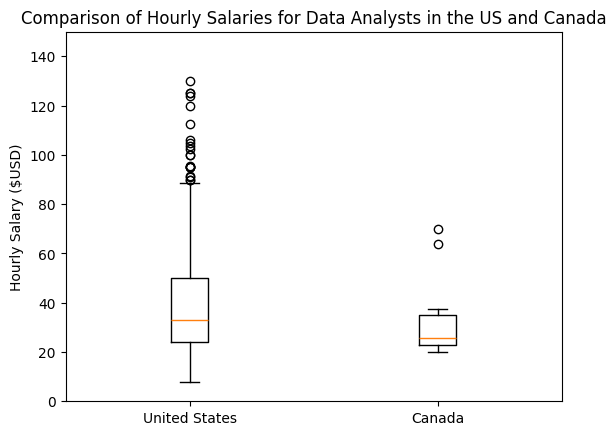

In [73]:
# Code Needed
countries = ['United States', 'Canada']

df_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(countries))].dropna(subset='salary_hour_avg')

df_each_country = [df_da [df_da ['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(df_each_country, tick_labels=countries)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.show()





---

## 🟥 Comparison of Hourly Salaries in Germany (2.18.3)

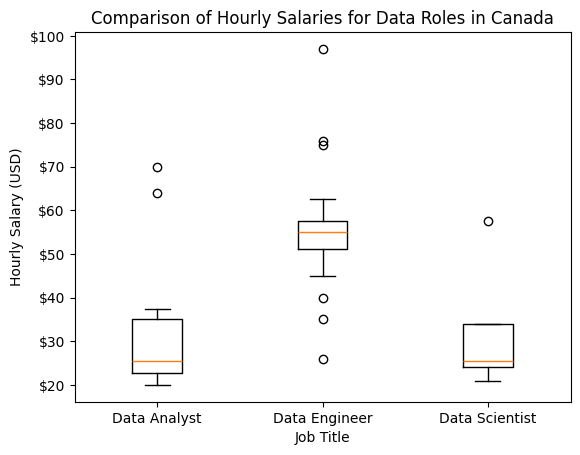

In [91]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_data = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].dropna(subset='salary_hour_avg')
df_job_titles = [df_data[df_data['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.boxplot(df_job_titles, tick_labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()


---